In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from scipy.stats import linregress

In [2]:
# Constants 
lower = 1.8292885330785609e-09
upper = 6.1707114669130533e-09
volume = (upper - lower) ** 3
print("Volume of simulation box is", volume, "m^3")

mass = 6.63e-26 # set mass of interacting potentials, take hydrogen gas for example (in kg)
epsilon = 0.24 # in kcal/mol
sigma = 3.405e-10 # in m
tau = np.sqrt(mass*sigma**2/epsilon)
print("The coefficent Tau is", tau)

Volume of simulation box is 8.182693580260386e-26 m^3
The coefficent Tau is 1.7896506380436378e-22


In [3]:
# generate list with all line numbers that will be read in 
header = 9
atoms_no = 2000
timesteps = 50
size = 100000


line_numbers = []
for i in range(size + header*timesteps):
    if (i+1) % (atoms_no + header) <= header and (i+1) % (atoms_no + header) != 0:
        pass
    else:
        line_numbers.append(i)
        
print(len(line_numbers))

100000


In [4]:
# Read in Data Files

with open(r"diffusionA.xyz", 'r') as file:
    lines = []
    for i, line in enumerate(file):
        if i in line_numbers:
            lines.append(line.strip())
        else:
            pass

In [5]:
input_array = np.array(lines)
new_input = np.array([np.array([float(i.strip()) for i in j.split(' ') if i]) for j in input_array])
array = np.transpose(new_input)

item = array[0]
atom_float = array[1]
atom = atom_float.astype(int)
identity = array[2]

x_disordered = 10e-10 * array[4] # x-position inside box (in m)
y_disordered = 10e-10 * array[5] 
z_disordered = 10e-10 * array[6]

[1329. 1860.  191. ...  187.  903. 1730.]
100000
[1329 1860  191 ...  187  903 1730]


In [37]:
# Make arrays with the 50 positions of the individual atoms 

atoms = []
x = []
y = []
z = []


for i in range(1, atoms_no +1):
    for j in enumerate(atom):
        if j[1] == i:
            atoms.append(atom[j[0]])
            x.append(x_disordered[j[0]])
            y.append(y_disordered[j[0]])
            z.append(z_disordered[j[0]])  
        else:
            pass

In [44]:
def distance(x, y, z):
    return np.sqrt((x[j])**2 + (y[j])**2 + (z[j])**2)

In [54]:
# Mean square displacement (compute for each timestep)

distances_0 = []
square_distances = []
MSD = []

# Distances at t=0 for all 2000 atoms 
for j in range(0, 100000, 50): 
    distances_0.append(distance(x, y, z))

# square displacements relative to t=0 for all atoms 
for j in range(0, 100000):
    atom_iteration = int(j / 50)
    if j % 50 == 0:
        pass
    else:
        distance_timestep = (distance(x, y, z) - distances_0[atom_iteration]) ** 2
        square_distances.append(distance_timestep)
    
# MSD for the 49 timesteps after t=0
for i in range(0, 49):
    MSD_t = 0
    for j in range(0+i, len(square_distances), 49):
        MSD_t += 1/2000 * square_distances[j]
    MSD.append(MSD_t)

    
    
#for i in range(1, timesteps):
#    for j in range(1, atoms_no+1):
#    MSD.append(distance(x, y, z)) 

print(len(square_distances))
print(MSD)

98000
[5.669135696833989e-18, 1.1121492302979339e-17, 1.600511833625311e-17, 2.240308219628311e-17, 2.8538957554339155e-17, 3.285561989808642e-17, 3.8659882709050653e-17, 4.391409195401729e-17, 4.8611502856854373e-17, 5.2925459563216347e-17, 5.927812663011468e-17, 6.553940964299218e-17, 6.980038635261991e-17, 7.544606352772232e-17, 7.841980608077743e-17, 8.272450632010442e-17, 8.632303171082961e-17, 8.930587542248669e-17, 9.322435810417257e-17, 9.585362953640053e-17, 1.0117359710489516e-16, 1.0629469538480169e-16, 1.1062027140267195e-16, 1.16752751786745e-16, 1.228208141691381e-16, 1.2897923468252083e-16, 1.3528566829069697e-16, 1.421258869840726e-16, 1.472552460670586e-16, 1.54307665016263e-16, 1.6008056637186388e-16, 1.664714282382436e-16, 1.7229930253926418e-16, 1.772877533768267e-16, 1.8046993288961787e-16, 1.8542123121777147e-16, 1.908402788167223e-16, 1.9619109981245634e-16, 1.9930998861619532e-16, 2.0455781925118743e-16, 2.0803465517736532e-16, 2.1381866463674011e-16, 2.19606700

Text(0, 0.5, 'MSD [m^2]')

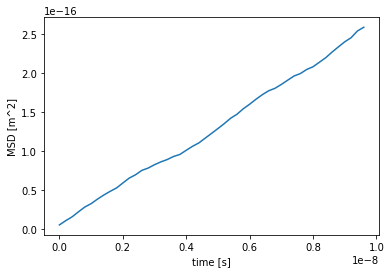

In [66]:
timestep = 10000 * 2 * 10e-15 # duration of timestep in seconds 
x = timestep * np.arange(49)
plt.plot(x, MSD)
plt.xlabel('time [s]')
plt.ylabel('MSD [m^2]')

In [67]:
# Calculate diffusion coefficient: MSD = 2nDt
# n - number of dimensions: n=3
# Thus MSD = 6Dt -> D = MSD/(6t) = slope / 6

linregress(x, MSD)


LinregressResult(slope=2.5757416670208567e-08, intercept=4.8226744865302485e-18, rvalue=0.9988660932220587, pvalue=8.223156549261715e-64, stderr=1.7907156517686678e-10, intercept_stderr=9.97671315674593e-19)

In [69]:
D = 2.5757416670208567e-08 / 6
print('The Diffusion coefficient is', D, 'm^2/s.')
D_reduced_units = D / (sigma**2) * tau
print('The Diffusion coefficient in reduced units is', D_reduced_units, 'Angstrom/Tau.')

The Diffusion coefficient is 4.292902778368094e-09 m^2/s.
The Diffusion coefficient in reduced units is 6.626513394930376e-12 Angstrom/Tau.


The Diffusion coefficient is in the range 10^-10 to 10^-9 m^2/s which suggests that the particles of interest are diffusing in an aqueous solution. 